In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics


In [24]:
#Read Data collection and Processing
car_dataset = pd.read_csv('car-dataset.csv')

#see the dimention of the dataset
car_dataset.shape


car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
#See datatype ofall attributes
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
# Find ther number of null values 
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
# The distribution of each category
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [31]:
# Encoding Fuel_Type Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding Seller_Type Column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encoding Transmission Column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)


In [33]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [35]:
#Splitting data into training and testing data (drop a column = 1, drop a column = 0)
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [36]:
#Split training and testing, test size = 10 percent for testing data
# random state = 2 > split data in the same way that we splited, 3 > new kind
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [38]:
print(Y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [39]:
#Training the model through LinearRegression
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, Y_train)


LinearRegression()

In [41]:
#Model evaluation, predictiong on training data
training_data_prediction = lin_reg_model.predict(X_train)

#to compare predicted and original values we should calculate R Square error
#Sklearn!
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squar Error : ", error_score)

R Squar Error :  0.8799451660493698


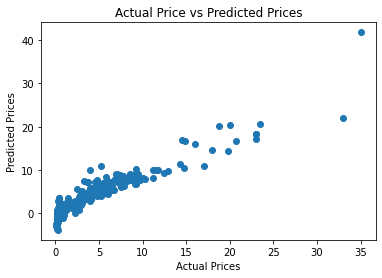

In [42]:
# Accuracy is 87% = R Squar Error :  0.8799451660493698

#visualize the actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Prices')
plt.show()


In [45]:
# prediction on the training data
test_data_prediction = lin_reg_model.predict(X_test)

#to compare predicted and original values we should calculate R Square error
#Sklearn!
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squar Error : ", error_score)

R Squar Error :  0.8365766715026903


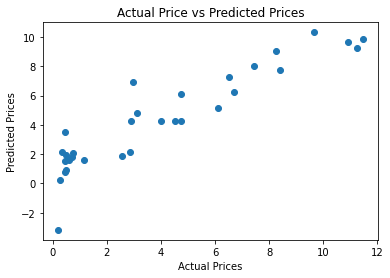

In [46]:
#visualize the actual prices and predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Prices')
plt.show()

In [47]:


#Training the model through LinearRegression
lass_reg_model = Lasso()

lass_reg_model.fit(X_train, Y_train)

#Model evaluation, predictiong on training data
training_data_prediction = lass_reg_model.predict(X_train)

#to compare predicted and original values we should calculate R Square error
#Sklearn!
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squar Error : ", error_score)

R Squar Error :  0.8427856123435794


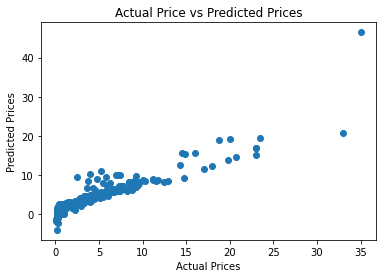

In [48]:

#visualize the actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Prices')
plt.show()

R Squar Error :  0.8709167941173195


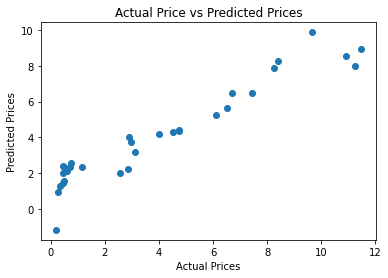

In [49]:

# prediction on the training data
test_data_prediction = lass_reg_model.predict(X_test)

#to compare predicted and original values we should calculate R Square error
#Sklearn!
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squar Error : ", error_score)

#visualize the actual prices and predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Prices')
plt.show()
